<a href="https://colab.research.google.com/github/arumugamkasi/Deep-Learning-Experiments/blob/master/PreTrainied_Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import torch
import torch.nn.functional as F
from transformers import AutoModel
model_ckpt = "distilbert-base-uncased"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") 
model = AutoModel.from_pretrained(model_ckpt).to(device)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.1/200.1 KB 25.9 MB/s eta 0:00:00


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertModel: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [4]:
def tokenize(batch):
    return tokenizer(batch["text"], padding=True, truncation=True)

In [5]:
from transformers import AutoTokenizer
tokenizer = AutoTokenizer.from_pretrained(model_ckpt)

text = "this is a test"
inputs = tokenizer(text, return_tensors="pt") 
print(f"Input tensor shape: {inputs['input_ids'].size()}")

Input tensor shape: torch.Size([1, 6])


In [7]:
inputs.items()

dict_items([('input_ids', tensor([[ 101, 2023, 2003, 1037, 3231,  102]])), ('attention_mask', tensor([[1, 1, 1, 1, 1, 1]]))])

In [8]:
for k,v in inputs.items():
  print (f"{k} : {v}")

input_ids : tensor([[ 101, 2023, 2003, 1037, 3231,  102]])
attention_mask : tensor([[1, 1, 1, 1, 1, 1]])


In [6]:
inputs = {k:v.to(device) for k,v in inputs.items()} 
print (inputs)
with torch.no_grad():
    outputs = model(**inputs) 
print (outputs)

{'input_ids': tensor([[ 101, 2023, 2003, 1037, 3231,  102]], device='cuda:0'), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1]], device='cuda:0')}
BaseModelOutput(last_hidden_state=tensor([[[-0.1565, -0.1862,  0.0528,  ..., -0.1188,  0.0662,  0.5470],
         [-0.3575, -0.6484, -0.0618,  ..., -0.3040,  0.3508,  0.5221],
         [-0.2772, -0.4459,  0.1818,  ..., -0.0948, -0.0076,  0.9958],
         [-0.2841, -0.3917,  0.3753,  ..., -0.2151, -0.1173,  1.0526],
         [ 0.2661, -0.5094, -0.3180,  ..., -0.4203,  0.0144, -0.2149],
         [ 0.9441,  0.0112, -0.4714,  ...,  0.1439, -0.7288, -0.1619]]],
       device='cuda:0'), hidden_states=None, attentions=None)


In [7]:
outputs.last_hidden_state.size()

torch.Size([1, 6, 768])

In [14]:
outputs.last_hidden_state[:,0].size()

torch.Size([1, 768])

In [8]:
def extract_hidden_states(batch):
    # Place model inputs on the GPU
    inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
    # Extract last hidden states
    with torch.no_grad():
        last_hidden_state = model(**inputs).last_hidden_state
        # Return vector for [CLS] token
        return {"hidden_state": last_hidden_state[:,0].cpu().numpy()}
    

In [9]:
!pip install datasets
from datasets import load_dataset
emotions = load_dataset("emotion")
emotions_encoded = emotions.map(tokenize, batched=True, batch_size=None)
emotions_encoded.set_format("torch",
                                columns=["input_ids", "attention_mask", "label"])

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.7/468.7 KB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 KB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 46.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.9/132.9 KB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 264.6/264.6 KB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.8/158.8 KB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.2/114.2 KB 13.9 MB/s eta 0:00:00


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/16000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2000 [00:00<?, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/split/1.0.0/cca5efe2dfeb58c1d098e0f9eeb200e9927d889b5a03c67097275dfb5fe463bd. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [10]:
emotions_hidden = emotions_encoded.map(extract_hidden_states, batched=True)


Map:   0%|          | 0/16000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [11]:
emotions_hidden["train"].column_names

['text', 'label', 'input_ids', 'attention_mask', 'hidden_state']

In [12]:
import numpy as np
X_train = np.array(emotions_hidden["train"]["hidden_state"])
X_valid = np.array(emotions_hidden["validation"]["hidden_state"])
y_train = np.array(emotions_hidden["train"]["label"])
y_valid = np.array(emotions_hidden["validation"]["label"])
X_train.shape, X_valid.shape

((16000, 768), (2000, 768))

In [14]:
!pip install umap-learn
from umap import UMAP
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
    # Scale features to [0,1] range
X_scaled = MinMaxScaler().fit_transform(X_train)
# Initialize and fit UMAP
mapper = UMAP(n_components=2, metric="cosine").fit(X_scaled) # Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y"]) 
df_emb["label"] = y_train
df_emb.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.2/88.2 KB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 40.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for umap-learn: filename=umap_learn-0.5.3-py3-none-any.whl size=82830 sha256=510fa5ae1c88089fa27423376eec332342e0fcecf75151fee6fe6ac3c388d076
  Stored in directory: /root/.cache/pip/wheels/f4/3e/1c/596d0a463d17475af648688443fa4846fef624d1390339e7e9
  Created wheel for pynndescent: filename=pynndescent-0.5.8-py3-none-any.whl size=55509 sha256=85640c7f46961c0d4c6dc5d8debd5f6d020192dad7aedbcb943502a6c426f4a5
  Stored in directory: /root/.cache/pip/wheels/b9/89/cc/59ab91ef5b21dc2ab3635528d7d227f49dfc9169905dcb959d
Successfully built umap-learn pynndescent


,X,Y,label
0,4.572635,7.269993,0
1,-2.739501,6.588988,0
2,5.490378,3.611398,3
3,-2.063534,4.248006,2
4,-2.800756,4.360254,3


In [21]:
#In case if need to reduce the features to just 4 features
mapper = UMAP(n_components=4, metric="cosine").fit(X_scaled) # Create a DataFrame of 2D embeddings
df_emb = pd.DataFrame(mapper.embedding_, columns=["X", "Y","A","B"]) 
df_emb["label"] = y_train
df_emb.head()

,X,Y,A,B,label
0,3.623976,5.365607,6.144320,4.774504,0
1,-1.208410,3.850230,11.607580,2.519309,0
2,4.915379,3.577596,5.918116,4.080752,3
3,-1.874124,3.717660,9.849133,3.100542,2
4,-2.108479,3.205042,10.631805,3.353958,3


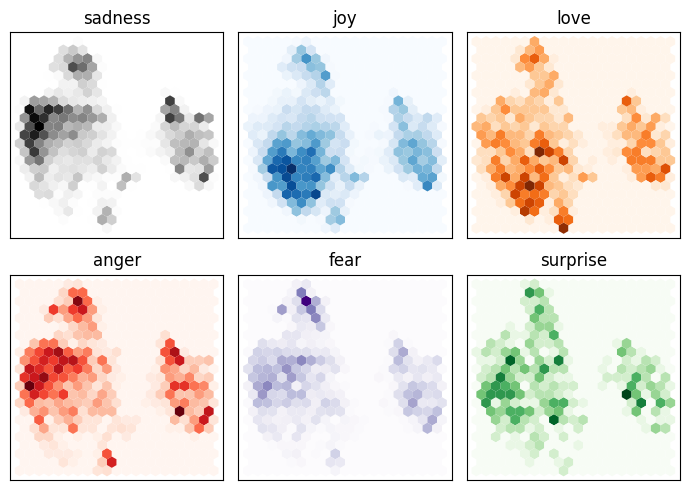

In [15]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 3, figsize=(7,5))
axes = axes.flatten()
cmaps = ["Greys", "Blues", "Oranges", "Reds", "Purples", "Greens"]
labels = emotions["train"].features["label"].names
for i, (label, cmap) in enumerate(zip(labels, cmaps)): 
  df_emb_sub = df_emb.query(f"label == {i}") 
  axes[i].hexbin(df_emb_sub["X"], df_emb_sub["Y"], cmap=cmap,
                       gridsize=20, linewidths=(0,))
  axes[i].set_title(label)
  axes[i].set_xticks([]), axes[i].set_yticks([])
plt.tight_layout()
plt.show()



In [16]:
from sklearn.linear_model import LogisticRegression
# We increase `max_iter` to guarantee convergence
lr_clf = LogisticRegression(max_iter=3000)
lr_clf.fit(X_train, y_train)
lr_clf.score(X_valid, y_valid)

0.633

In [17]:
from sklearn.dummy import DummyClassifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_valid, y_valid)

0.352

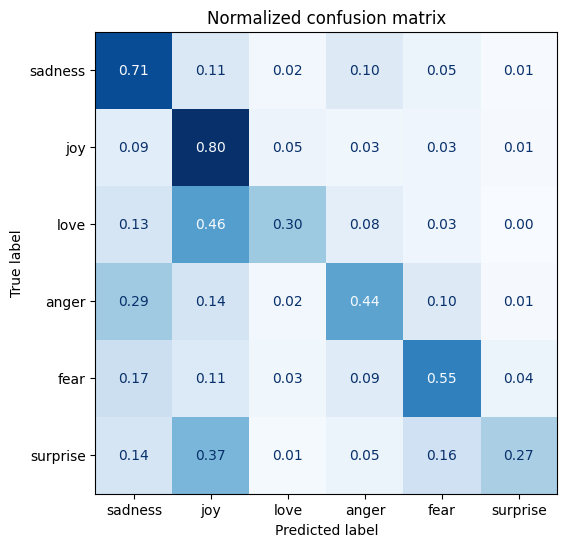

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
def plot_confusion_matrix(y_preds, y_true, labels):
  cm = confusion_matrix(y_true, y_preds, normalize="true")
  fig, ax = plt.subplots(figsize=(6, 6))
  disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels) 
  disp.plot(cmap="Blues", values_format=".2f", ax=ax, colorbar=False) 
  plt.title("Normalized confusion matrix")
  plt.show()
y_preds = lr_clf.predict(X_valid)
plot_confusion_matrix(y_preds, y_valid, labels)

In [19]:
from transformers import AutoModelForSequenceClassification
num_labels = 6
model = (AutoModelForSequenceClassification
             .from_pretrained(model_ckpt, num_labels=num_labels)
             .to(device))

Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_layer_norm.bias', 'vocab_transform.bias', 'vocab_projector.weight', 'vocab_layer_norm.weight', 'vocab_transform.weight', 'vocab_projector.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'pre_classifier.weight', 'pre_classi

In [20]:
from sklearn.metrics import accuracy_score, f1_score
def compute_metrics(pred):
  labels = pred.label_ids
  preds = pred.predictions.argmax(-1)
  f1 = f1_score(labels, preds, average="weighted") 
  acc = accuracy_score(labels, preds)
  return {"accuracy": acc, "f1": f1}


In [22]:
from huggingface_hub import notebook_login 
notebook_login()

Token is valid.
Your token has been saved in your configured git credential helpers (store).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [23]:
from transformers import Trainer, TrainingArguments
batch_size = 64
logging_steps = len(emotions_encoded["train"]) // batch_size
model_name = f"{model_ckpt}-finetuned-emotion"
training_args = TrainingArguments(output_dir=model_name,
                                      num_train_epochs=2,
                                      learning_rate=2e-5,
                                      per_device_train_batch_size=batch_size,
                                      per_device_eval_batch_size=batch_size,
                                      weight_decay=0.01,
                                      evaluation_strategy="epoch",
                                      disable_tqdm=False,
                                      logging_steps=logging_steps,
                                      push_to_hub=True,
                                      log_level="error")

In [24]:
from transformers import Trainer
trainer = Trainer(model=model, args=training_args,
                      compute_metrics=compute_metrics,        
                      train_dataset=emotions_encoded["train"],
                      eval_dataset=emotions_encoded["validation"],
                      tokenizer=tokenizer)
trainer.train();

Cloning https://huggingface.co/arumugamkasi/distilbert-base-uncased-finetuned-emotion into local empty directory.


Download file pytorch_model.bin:   0%|          | 3.40k/255M [00:00<?, ?B/s]

Download file training_args.bin: 100%|##########| 3.50k/3.50k [00:00<?, ?B/s]

Clean file training_args.bin:  29%|##8       | 1.00k/3.50k [00:00<?, ?B/s]

Download file runs/Apr08_09-21-31_e0a1ecd26142/events.out.tfevents.1680945753.e0a1ecd26142.149.0: 100%|#######…

Clean file runs/Apr08_09-21-31_e0a1ecd26142/events.out.tfevents.1680945753.e0a1ecd26142.149.0:  21%|##1       …

Download file runs/Apr08_09-21-31_e0a1ecd26142/1680945753.837453/events.out.tfevents.1680945753.e0a1ecd26142.1…

Clean file runs/Apr08_09-21-31_e0a1ecd26142/1680945753.837453/events.out.tfevents.1680945753.e0a1ecd26142.149.…

Clean file pytorch_model.bin:   0%|          | 1.00k/255M [00:00<?, ?B/s]

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.827700,0.314022,0.907500,0.905526
2,0.248700,0.221582,0.926500,0.926531


In [25]:
preds_output = trainer.predict(emotions_encoded["validation"])

In [26]:
preds_output.metrics

{'test_loss': 0.22158177196979523,
 'test_accuracy': 0.9265,
 'test_f1': 0.9265307213742865,
 'test_runtime': 4.0688,
 'test_samples_per_second': 491.545,
 'test_steps_per_second': 7.865}

In [27]:
y_preds = np.argmax(preds_output.predictions, axis=1)

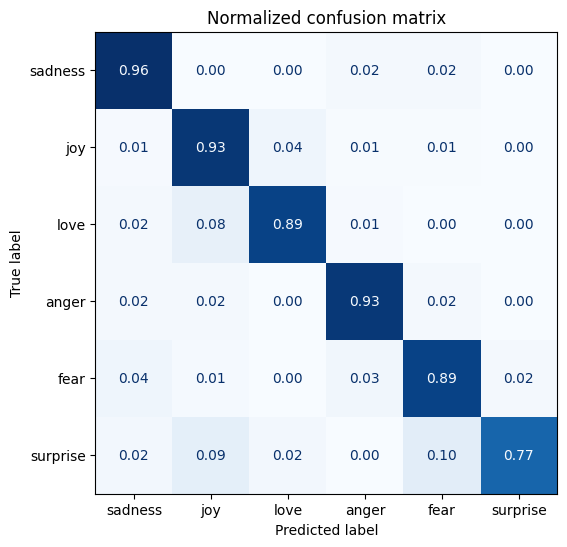

In [28]:
plot_confusion_matrix(y_preds, y_valid, labels)

In [30]:
from torch.nn.functional import cross_entropy
def forward_pass_with_label(batch):
  # Place all input tensors on the same device as the model 
  inputs = {k:v.to(device) for k,v in batch.items() if k in tokenizer.model_input_names}
  with torch.no_grad():
    output = model(**inputs)
  pred_label = torch.argmax(output.logits, axis=-1)
  loss = cross_entropy(output.logits, batch["label"].to(device),reduction="none")
  # Place outputs on CPU for compatibility with other dataset columns
  return {"loss": loss.cpu().numpy(), "predicted_label": pred_label.cpu().numpy()}

In [31]:
# Convert our dataset back to PyTorch tensors
emotions_encoded.set_format("torch",
                                columns=["input_ids", "attention_mask", "label"])
# Compute loss values
emotions_encoded["validation"] = emotions_encoded["validation"].map(
        forward_pass_with_label, batched=True, batch_size=16)

Map:   0%|          | 0/2000 [00:00<?, ? examples/s]

In [33]:
def label_int2str(row):
  return emotions["train"].features["label"].int2str(row)
emotions_encoded.set_format("pandas")
cols = ["text", "label", "predicted_label", "loss"]
df_test = emotions_encoded["validation"][:][cols]
df_test["label"] = df_test["label"].apply(label_int2str)
df_test["predicted_label"] = (df_test["predicted_label"]
.apply(label_int2str))

In [34]:
df_test.sort_values("loss", ascending=False).head(10)

,text,label,predicted_label,loss
882,i feel badly about reneging on my commitment t...,love,sadness,5.365815
1801,i feel that he was being overshadowed by the s...,love,sadness,5.246759
1963,i called myself pro life and voted for perry w...,joy,sadness,5.228273
1870,i guess i feel betrayed because i admired him ...,joy,sadness,5.159645
1950,i as representative of everything thats wrong ...,surprise,sadness,5.138708
465,i would eventually go in to these stores but i...,joy,fear,4.971002
1274,i am going to several holiday parties and i ca...,joy,sadness,4.912059
1111,im lazy my characters fall into categories of ...,joy,fear,4.777519
318,i felt ashamed of these feelings and was scare...,fear,sadness,4.660211
1509,i guess this is a memoir so it feels like that...,joy,fear,4.551682


In [35]:
df_test.sort_values("loss", ascending=True).head(10)

,text,label,predicted_label,loss
1873,i feel practically virtuous this month i have ...,joy,joy,0.016293
19,i had lunch with an old friend and it was nice...,joy,joy,0.016829
578,i got to christmas feeling positive about the ...,joy,joy,0.017524
632,i feel he is an terrific really worth bet,joy,joy,0.017567
1263,i feel this way about blake lively,joy,joy,0.017611
1154,i love feeling carefree and without all these ...,joy,joy,0.017664
1320,im feeling positive but its impossible to desc...,joy,joy,0.017667
856,i feel is more energetic in urban singapore th...,joy,joy,0.017675
1780,ive explained that he is very creative and lov...,joy,joy,0.017925
726,i feel too energetic and some days i just feel...,joy,joy,0.017928


In [36]:
trainer.push_to_hub(commit_message="Training completed!")

Upload file runs/Apr09_09-31-51_b6f252db8ae4/events.out.tfevents.1681032791.b6f252db8ae4.953.0: 100%|#########…

To https://huggingface.co/arumugamkasi/distilbert-base-uncased-finetuned-emotion
   fd0fa1e..5a8ef29  main -> main

   fd0fa1e..5a8ef29  main -> main

To https://huggingface.co/arumugamkasi/distilbert-base-uncased-finetuned-emotion
   5a8ef29..ea1e3f2  main -> main

   5a8ef29..ea1e3f2  main -> main



'https://huggingface.co/arumugamkasi/distilbert-base-uncased-finetuned-emotion/commit/5a8ef297ba0dae679ec2786409494ffd09fded12'

In [37]:
from transformers import pipeline
# Change `transformersbook` to your Hub username
model_id = "transformersbook/distilbert-base-uncased-finetuned-emotion"
classifier = pipeline("text-classification", model=model_id)

In [38]:
custom_tweet = "I saw a movie today and it was really good."
preds = classifier(custom_tweet, return_all_scores=True)

/usr/local/lib/python3.9/dist-packages/transformers/pipelines/text_classification.py:104: UserWarning: `return_all_scores` is now deprecated,  if want a similar funcionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


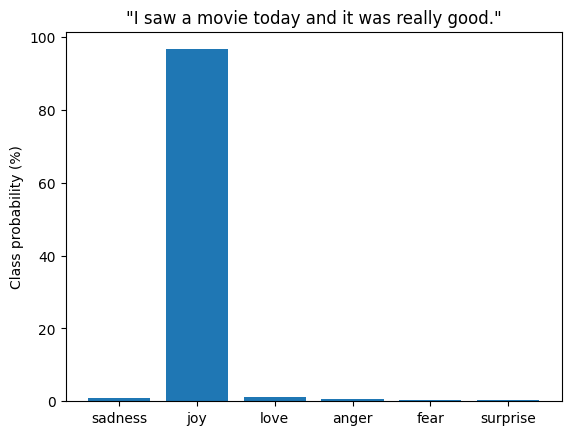

In [39]:
preds_df = pd.DataFrame(preds[0])
plt.bar(labels, 100 * preds_df["score"], color='C0')
plt.title(f'"{custom_tweet}"')
plt.ylabel("Class probability (%)")
plt.show()